 # Práctica calificada:  Regresión No lineal.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión no Lineal  \\
  

 ----

Integrantes

- Integrante 1 : Benjamin Soto Mayta            100($\%$)
- Integrante 2 : Fabricio Chavez Balarezo  100($\%$)
- Integrante 3 : Fabrizzio Vilchez Esppinoza            100($\%$)
- Integrante 4 : Jesus Egusquiza Ore 100($\%$)





En este concurso, tendrás dos conjuntos de datos: uno de entrenamiento y otro de prueba. Deberás usar una función de pérdida MAE (Error Absoluto Medio) con una regularización L2. Además, debes crear un modelo de regresión no lineal y encontrar los hiperparámetros adecuados:

- $α$: Tasa de aprendizaje (Learning Ratio).  
- $λ$: Parámetro de regularización.   
- $epochs$: Número de iteraciones en el entrenamiento.   


Es importante destacar que los datos ya están normalizados.
  

Para evaluar tu modelo, pruébalo con los datos de prueba y coloca las predicciones en este archivo Excel.  [link para subir su predicción](https://docs.google.com/spreadsheets/d/1Bzs020OO0e4lUECBmjZ_94UKcjd2g0pZYcCHniijYPU/edit?usp=sharing)



#### El ganador será aquel que obtenga el menor MSE (Error Cuadrático Medio).

# Nota:  Asegúrate de que tu archivo Colab se ejecute correctamente y devuelva los mismos resultados que ha logrado tu equipo, en caso contrario tu equipo es descalificado.







In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn.preprocessing import MinMaxScaler

# Carga de datos de entrenamiento y de testing
  1. Debe subir los archivos de entrenamiento y testing
  2. Archivo de training : [Donwload Here](https://drive.google.com/file/d/1tbtyc3g8mWqcylRICKh83WUTTsMyAV1g/view?usp=sharing)
  3. Archivo de testing  : [Donwload Here](https://drive.google.com/file/d/1UcK6b08FGgKtqsfMBeH2RXmnjw5H6Mty/view?usp=sharing)
  4. Los datos están normalizados. **No requiere normalizar**.






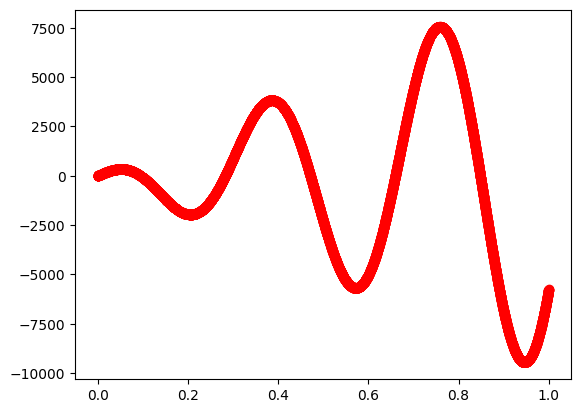

In [32]:
# Descomente este código para buscar sus archivos en el ordenador"

#from google.colab import files
#file_train= files.upload()
#file_test= files.upload()
#file_real= files.upload()


data_train = np.genfromtxt('train.csv',delimiter = ',')

data_test = np.genfromtxt('test.csv',delimiter = ',')

x_train = data_train[0]
y_train = data_train[1]

y_train_norm = (max(y_train) - y_train) /(max(y_train) - min(y_train))

x_test = data_test

plt.plot(x_train, y_train, 'ro')



# Modelo

Nota: Función de regresión no lineal
$h(X) = X*W^t$



In [33]:
def h(X, W):
    return np.dot(X, W)



# Loss function


$\mathcal{L} =  \frac{||Y - XW^t||^2_2}{2n} + \lambda||W||^2_2$



In [34]:
def Error(X, W, Y, lam ):
    e = Y - h(X, W)    #error
    return ((np.linalg.norm(e , 2))**2)/(2 * len(Y)) + lam * np.dot(W, W) #Ridge


# Cálculo de derivadas


$dw_j = \frac{\sum_{i=0}^m(y_i - h(x_i))(-x_{i}^j)}{n} + 2\lambda w_j$

In [35]:
def derivada(X, W, Y, lam):
    e = Y - h(X, W)
    return -np.dot(X.T, e) / len(Y) + 2 * lam * W

# Actualiación de parámetros

Recuerde: $\frac{\partial L}{\partial w}$ representa un vector con todas las derivadas de la función de pérdida con rescto a W.

$W  = W - \alpha*\frac{\partial L}{\partial W} $



In [36]:
def update(W, dW, alpha):
    return W - alpha * dW


# Training

In [37]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    L = Error(X,W,Y,lam)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i%10000==0:
            print(L)
    return W, loss

In [38]:
def Convertir_a_Matriz(x_train,p):
   X = np.vander(x_train, p+1, increasing=True)
   return X

In [39]:
def Median_error(X , Y  , W):
    e=Y-h(X,W)
    return ((np.linalg.norm(e , 2))**2)/(2 * len(Y))

# Testing
Recuerde que antes de pasar x_test a la función h, debe  convertir el vector
 x_test en una matriz de grado p.



0.17482472662245277


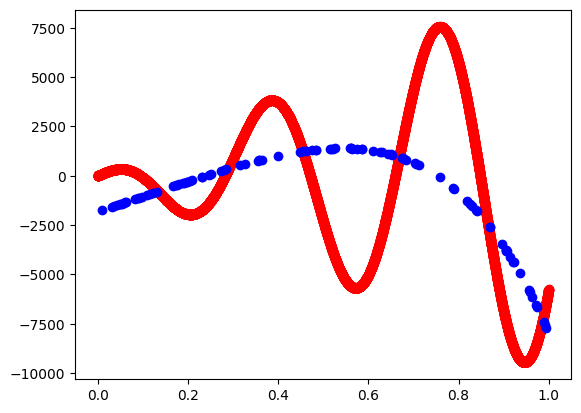

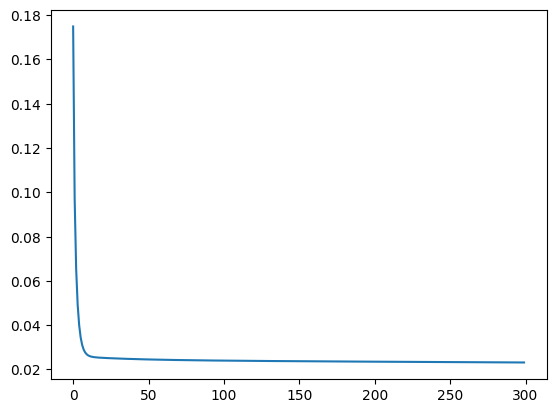

In [40]:
# Recuerde que antes de pasar x_test a la función h, debe  convertir el vector x_test en una matriz de grado p.
p = 5 # Grado del polinomio
#training parameters 
epochs= 300
alpha = 0.9
lam = 0.000000000000001

X_train = Convertir_a_Matriz(x_train,p)

X_test = Convertir_a_Matriz(x_test, p)
W, loss = train(X_train, y_train_norm, epochs, alpha, lam)

y_aprox_norm = h(X_test , W)
y_max = max(y_train)
y_aprox = y_max - y_aprox_norm * (y_max - min(y_train))
np.savetxt("Grupo1_Resultados.csv", y_aprox, delimiter=",")

#Graficar
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_aprox, 'bo')

#plot loss
plt.figure()
plt.plot(loss)